In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pylab as plb
from scipy import stats

In [30]:
%matplotlib inline

In [34]:
df = pd.read_excel('free_energy_analysis.xlsx', sheet_name='summary')

In [35]:
df

,Rfam_CM,ecoli_id_1,sal_id_1,sal_id_2,ecoli hits,sal1 hits,sal2 hits,Rfam hits,better,%better,...,alt name,age cat,approx length,dG of selected model,score of selected model,dG/len,dG of hm model,score of hm model,hm source,std dev of randomized
0,RF00119,c0299_EC,NaN,NaN,371.0,NaN,NaN,371.0,Rfam,NaN,...,c0299,young,79,-10.32,0.010903,-0.130633,-11.15,-0.097644,ecoli,3.002760
1,RF00116,C0465_rf,NaN,NaN,364.0,NaN,NaN,364.0,Rfam,NaN,...,C0465,young,78,-16.67,-0.914351,-0.213718,-12.82,-0.471178,ecoli,2.774322
2,RF00117,c0719_EC,NaN,NaN,296.0,NaN,NaN,296.0,Rfam,NaN,...,c0719,young,222,-52.57,-0.361414,-0.236802,-47.78,0.141042,ecoli,4.315733
3,RF00084,csrC_EC_rf,NaN,NaN,2089.0,NaN,NaN,2129.0,Rfam,NaN,...,csrC,middle,254,-66.31,-5.969349,-0.261063,-53.66,-10.607488,ecoli,3.373381
4,RF00122,gadY_EC_rf,NaN,NaN,369.0,NaN,NaN,369.0,Rfam,NaN,...,gadY,young,114,-27.68,-0.561301,-0.242807,-29.00,-0.835002,ecoli,4.010171
5,RF00125,is128_EC,NaN,NaN,150.0,NaN,NaN,150.0,Rfam,NaN,...,is128,young,209,-36.69,-5.637486,-0.175550,-47.82,-4.365234,ecoli,3.991218
6,RF01517,iscRS_rf,NaN,NaN,931.0,NaN,NaN,931.0,Rfam,NaN,...,iscRS,middle,110,-31.31,-3.959149,-0.284636,-21.82,-3.110801,ecoli,3.114953
7,RF00124,isrC_EC,NaN,NaN,425.0,NaN,NaN,425.0,Rfam,NaN,...,isrC,young,204,-51.22,-6.533281,-0.251078,-49.15,-7.132285,ecoli,3.722748
8,RF00121,micC_EC_rf,NaN,NaN,868.0,NaN,NaN,871.0,Rfam,NaN,...,micC,middle,121,-19.28,-13.071566,-0.159339,-18.76,-4.003366,ecoli,2.667830
9,RF00033,micF_EC_rf,NaN,NaN,924.0,NaN,NaN,957.0,Rfam,NaN,...,micF,middle,94,-17.29,-8.635498,-0.183936,-18.95,-6.757628,ecoli,2.134225


In [37]:
df.columns

Index(['Rfam_CM', 'ecoli_id_1', 'sal_id_1', 'sal_id_2', 'ecoli hits',
       'sal1 hits', 'sal2 hits', 'Rfam hits', 'better', '%better', 'Rfam dG',
       'Rfam score', 'Ecoli dG', 'Ecoli score', 'Sal1 dG', 'Sal1 score',
       'Gain node', 'alt name', 'age cat', 'approx length',
       'dG of selected model', 'score of selected model', 'dG/len',
       'dG of hm model', 'score of hm model', 'hm source',
       'std dev of randomized'],
      dtype='object')

# Plot of free energy by age category

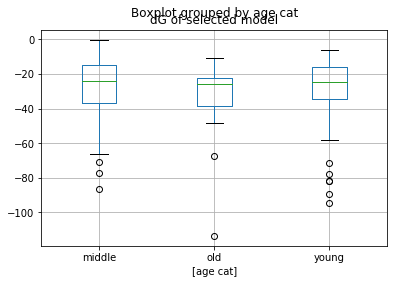

In [17]:
df[['dG of selected model', 'age cat']].boxplot(by='age cat')

## Normalized for length

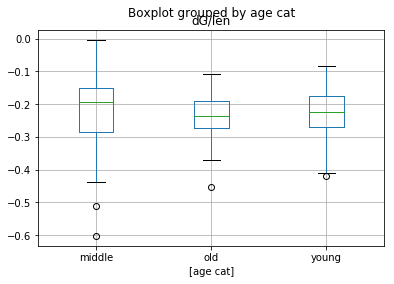

In [18]:
df[['dG/len', 'age cat']].boxplot(by='age cat')

# Plot of distance from mean (aka "score") by age

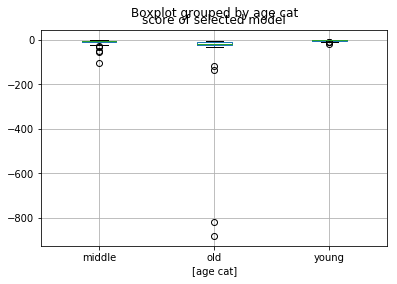

In [6]:
df[['score of selected model', 'age cat']].boxplot(by='age cat')

### Removed records with very high scores... these were Rfam models for which randomized versions produced a lot of predicted structure with free energy of approx. 0 kj/mol

In [14]:
no_outliers = df[df['score of selected model'] > -20]

In [15]:
no_outliers

,Rfam_CM,ecoli_id_1,sal_id_1,sal_id_2,ecoli hits,sal1 hits,sal2 hits,Rfam hits,better,%better,...,Ecoli score,Sal1 dG,Sal1 score,Gain node,alt name,age cat,approx length,dG of selected model,score of selected model,dG/len
2,RF00014,dsrA_EC,DsrA_ST_rf,NaN,919.0,919.0,NaN,919.0,Rfam,NaN,...,-6.672650,-12.21,-4.238471,7,dsrA,middle,87,-30.98,-10.026372,-0.356092
6,RF00033,micF_EC_rf,NaN,NaN,924.0,NaN,NaN,957.0,Rfam,NaN,...,-6.757628,NaN,NaN,7,micF,middle,94,-17.29,-8.635498,-0.183936
8,RF00035,oxyS_EC,NaN,NaN,911.0,NaN,NaN,919.0,Rfam,NaN,...,-3.028696,NaN,NaN,8,oxyS,middle,110,-30.42,-4.413600,-0.276545
11,RF00078,micA_EC_rf,MicA_ST_rf,NaN,1087.0,1090.0,NaN,1093.0,Rfam,NaN,...,-2.365463,-7.72,-4.570783,3,micA,old,72,-12.21,-14.545546,-0.169583
12,RF00079,omrA_EC,OmrA_ST,NaN,2020.0,2020.0,NaN,2020.0,Rfam,NaN,...,-7.533308,-18.72,-6.831684,3,omrA/B,old,88,-24.06,-17.709632,-0.273409
13,RF00079,omrB_EC,OmrB_ST_rf,NaN,2021.0,2020.0,NaN,2020.0,homemade,0.000495,...,-8.100203,-16.45,-6.141329,3,omrA/B,old,88,-24.06,-17.709632,-0.273409
14,RF00081,arcZ_EC_rf,ArcZ_ST_rf,NaN,1078.0,1076.0,NaN,1094.0,Rfam,NaN,...,-2.075060,-13.60,-2.184981,2,arcZ,old,108,-22.73,-5.710563,-0.210463
15,RF00083,glmZ_EC_rf,GlmZ_ST_rf,NaN,2201.0,2201.0,NaN,2201.0,Rfam,NaN,...,-7.617977,-30.89,-6.429868,2,glmZ,old,207,-48.56,-16.152471,-0.234589
16,RF00084,csrC_EC_rf,NaN,NaN,2089.0,NaN,NaN,2129.0,Rfam,NaN,...,-10.607488,NaN,NaN,6,csrC,middle,254,-66.31,-5.969349,-0.261063
17,RF00110,rybB_EC,NaN,NaN,1104.0,NaN,NaN,1104.0,Rfam,NaN,...,-1.200312,NaN,NaN,2,rybB,old,79,-24.75,-8.332422,-0.313291


# Now when plotting score, potential relationships emerge

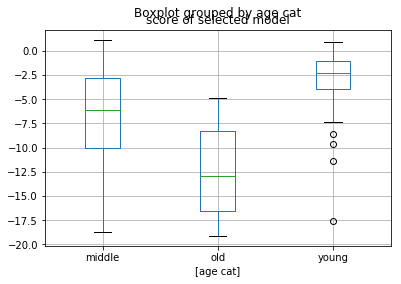

In [16]:
no_outliers[['score of selected model', 'age cat']].boxplot(by='age cat')

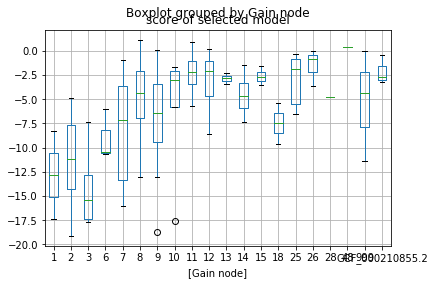

In [19]:
no_outliers[['score of selected model', 'Gain node']].boxplot(by='Gain node')

# Homemade models only

### Broke ties by performance (# hits)... broke ties with better dG

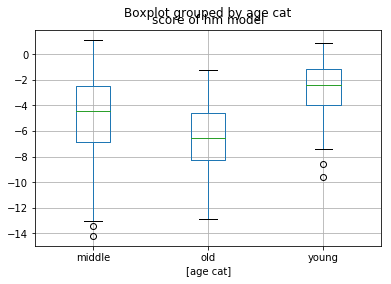

In [38]:
df[['score of hm model', 'age cat']].boxplot(by='age cat')

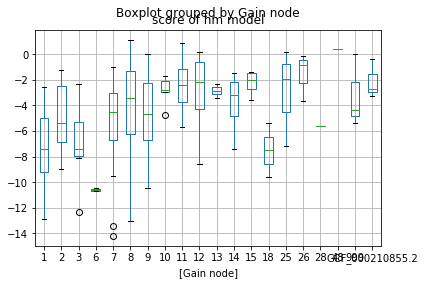

In [40]:
df[['score of hm model', 'Gain node']].boxplot(by='Gain node')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11313c0b8>]], dtype=object)

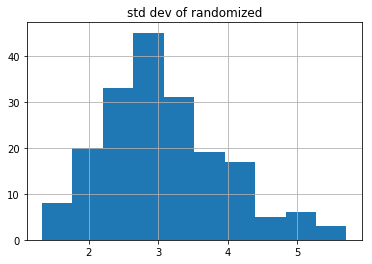

In [41]:
df[['std dev of randomized']].hist()

## Assign phylogentics "levels" to internal nodes. E.g. N11 and N26 are same level

In [43]:
level_dict = {}

#### for nodes 1-15, level == internal node label

In [46]:
for i in range(1, 16):
    level_dict[i] = i

In [57]:
level_dict.update({25: 10, 26: 11, 18: 16, 'GCF_000210855.2': 17, 999: 17, 28: 13, 48: 15})

In [58]:
level_dict

{1: 1,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 18: 16,
 2: 2,
 25: 10,
 26: 11,
 28: 13,
 3: 3,
 4: 4,
 48: 15,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 999: 17,
 'GCF_000210855.2': 17}

In [59]:
df['gn_level'] = df['Gain node'].map(level_dict)

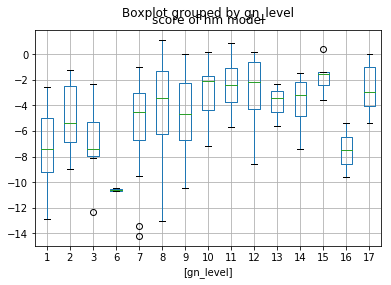

In [61]:
df[['score of hm model', 'gn_level']].boxplot(by='gn_level')

## Distribution of scores of sRNAs gained at N2 & N3

In [62]:
oi = [2, 3]

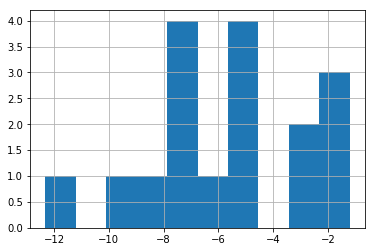

In [65]:
df[df['gn_level'].isin(oi)]['score of hm model'].hist()

#### the sRNAs reflected in the histogram above

In [66]:
df[df['gn_level'].isin(oi)]

,Rfam_CM,ecoli_id_1,sal_id_1,sal_id_2,ecoli hits,sal1 hits,sal2 hits,Rfam hits,better,%better,...,age cat,approx length,dG of selected model,score of selected model,dG/len,dG of hm model,score of hm model,hm source,std dev of randomized,gn_level
13,RF00110,rybB_EC,NaN,NaN,1104.0,NaN,NaN,1104.0,Rfam,NaN,...,old,79,-24.75,-8.332422,-0.313291,-5.49,-1.200312,ecoli,1.877845,2
19,RF00081,arcZ_EC_rf,ArcZ_ST_rf,NaN,1078.0,1076.0,NaN,1094.0,Rfam,NaN,...,old,108,-22.73,-5.710563,-0.210463,-25.28,-2.075060,ecoli,3.227859,2
23,RF00083,glmZ_EC_rf,GlmZ_ST_rf,NaN,2201.0,2201.0,NaN,2201.0,Rfam,NaN,...,old,207,-48.56,-16.152471,-0.234589,-52.60,-7.617977,ecoli,3.869387,2
24,RF00079,omrA_EC,OmrA_ST,NaN,2020.0,2020.0,NaN,2020.0,Rfam,NaN,...,old,88,-24.06,-17.709632,-0.273409,-19.48,-7.533308,ecoli,2.055644,3
25,RF00079,omrB_EC,OmrB_ST_rf,NaN,2021.0,2020.0,NaN,2020.0,homemade,0.000495,...,old,88,-24.06,-17.709632,-0.273409,-12.84,-8.100203,ecoli,1.438729,3
34,RF02030,tp2_ST_rf,tp2_ST_rf,NaN,998.0,989.0,NaN,1091.0,Rfam,NaN,...,old,114,-22.87,-118.762762,-0.200614,-25.50,-8.981519,ecoli,2.310010,2
35,RF02031,Tpke11_EC_rf,tpke11_ST_rf,NaN,1006.0,1004.0,NaN,1105.0,Rfam,NaN,...,old,78,-22.50,-27.914511,-0.288462,-25.35,-5.400202,ecoli,2.785470,2
48,0,psrN_EC,psrN_EC,NaN,1048.0,1047.0,NaN,NaN,ecoli,NaN,...,old,188,-45.44,-12.315317,-0.241702,-45.44,-12.315317,ecoli,2.786498,3
49,RF00082,psrO_SraG_EC_rf,SraG_ST_rf,NaN,1112.0,1105.0,NaN,1104.0,ecoli,0.007246,...,old,172,-29.26,-4.843026,-0.170116,-29.26,-4.843026,ecoli,3.417822,2
70,RF02029,NaN,SraA_rf_ST,NaN,NaN,1062.0,NaN,1087.0,Rfam,NaN,...,old,97,-10.86,-16.271415,-0.111959,-16.80,-2.331490,sal,2.724309,3
